In [20]:
import random
from matplotlib import pyplot as plt
import numpy as np

In [155]:
def value_iteration(goal=100, p=0.5, theta=1e-9, gamma=0.99, max_iteration=1000):
  v = np.zeros(goal+1)
  policy = np.zeros(goal+1, dtype=int)
  v[goal] = 1.0 # Reward

  for step in range(max_iteration):
    delta = 0.0

    v_old = np.copy(v)
    for s in range(1, goal):
      actions = np.arange(1, min(s, goal - s) + 1) # Available stakes

      estimated_values = p * (gamma * v[s + actions]) + (1.0 - p) * (gamma * v[s - actions])
      v[s] = np.max(estimated_values)
      policy[s] = actions[np.argmax(estimated_values)]

      delta = max(delta, np.abs(v_old[s] - v[s]))

    if delta < theta:
      print("Number of steps:", step+1)
      break

  return v, policy

In [170]:
goal = 100
p = 0.4
gamma = 1.0
threshold = 1e-25

v, policy = value_iteration(goal, p, threshold, gamma)

# Print the optimal policy
print("Optimal Policy:")
print(policy)

# Print the state-value function
print("State-Value Function:")
print(v)

Number of steps: 33
Optimal Policy:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10 16 17 18  6  5  4  3  2
  1 25  1  2  3  4  5  6 32  8  9 10 11 13 12 39 10  9  8  7  6  5  4  3
  2 49 50  1  2  3  4 45  6  7  8  9 10 39 12 37 14 35  9  8  7  6  5 21
  3  2 24 25  1  2  3  4  5  6 18  8 16 10 11 13 12 11 10  9  8  7  6  5
  4  3  2  1  0]
State-Value Function:
[0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.37622198 0.4        0.40309844 0.40774609 0.41383821
 0.41936523 0.4260781  0.4345955

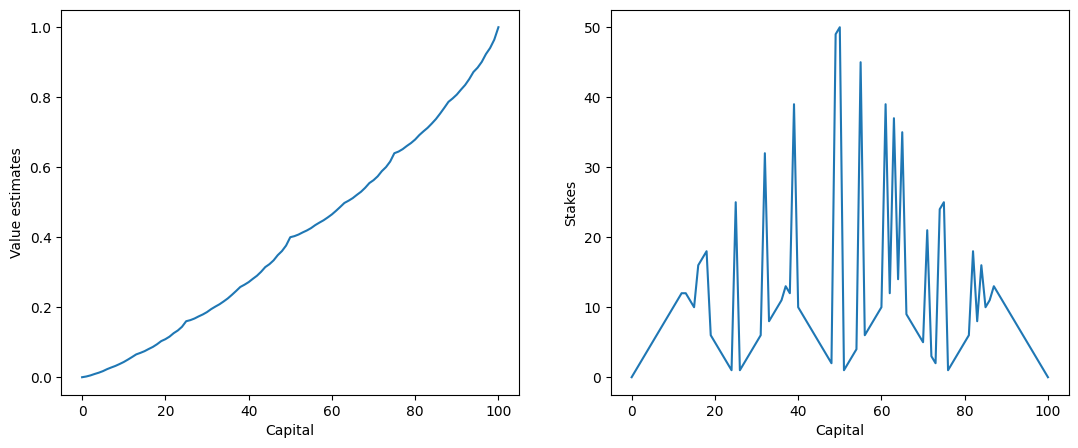

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(13, 5))

ax1.plot(v)
ax1.set_ylabel('Value estimates')
ax1.set_xlabel('Capital')

ax2.plot(policy)
ax2.set_ylabel('Stakes')
ax2.set_xlabel('Capital')

plt.show()

In [172]:
def sample(capital, goal):
  stakes = []

  while(capital < goal and capital > 0):
    stake = policy[capital]
    stakes.append(stake)

    if random.random() <= p:
      capital += stake
    else:
      capital -= stake

  print("Stakes:")
  print(stakes)

  if capital>=goal:
    print("Win! Capital =", capital)
  else:
    print("Loss! Capital =", capital)

In [167]:
capital = 30
sample(capital, goal)

Stakes:
[5, 25, 50]
Win! Capital = 100
